# Sound localisation data analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

## Utils function

In [2]:
def get_labels(df, azimuth_resolution=20):
    df['labels'] = (df['azimuth'] + 90)
    df['labels'] = df['labels'] // azimuth_resolution
    df['labels'] = df['labels'].astype(int)
    return df

## Loading  datasets

In [3]:
DATASET_TRAIN_PATH = "/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/people_dataset.csv"
DATASET_TEST_PATH = "/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/test_dataset.csv"

df_train = pd.read_csv(DATASET_TRAIN_PATH)
df_test = pd.read_csv(DATASET_TEST_PATH)
df_train.head()

,subject_id,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,labels
0,37,/home/jonas/CLionProjects/soundLocalizer/datas...,-57,17,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,33
1,37,/home/jonas/CLionProjects/soundLocalizer/datas...,47,22,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,137
2,37,/home/jonas/CLionProjects/soundLocalizer/datas...,20,19,-0.307692,0.021978,0.120989,0.043956,0.305970,0.485662,110
3,37,/home/jonas/CLionProjects/soundLocalizer/datas...,19,19,22.197802,0.021978,-50.076813,5.670330,16.562474,3.656806,109
4,37,/home/jonas/CLionProjects/soundLocalizer/datas...,86,77,18.857143,0.109890,25.351758,0.043956,-0.015715,3.196252,176


# Distribution of angles train dataset

Numbers of samples in training set (1189, 11)


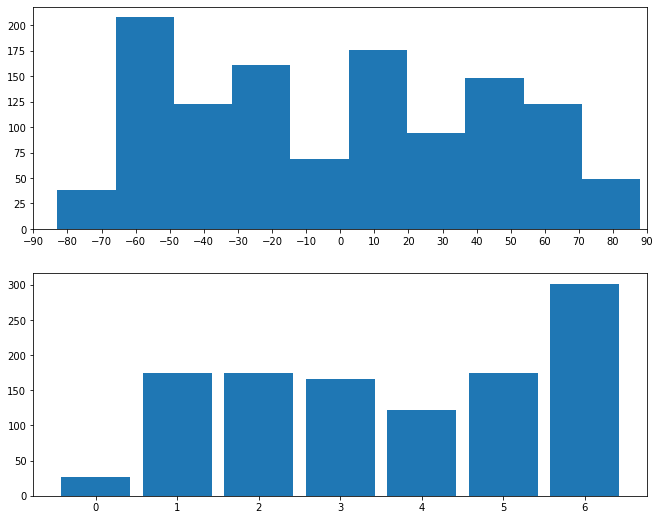

In [4]:
print(f"Numbers of samples in training set {df_train.shape}")

df_train = get_labels(df_train, 20)


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))

ax1.hist(df_train['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_train['labels'].min(), df_train['labels'].max() )]

ax2.hist(df_train['labels'], bins=bins, align='left', rwidth=0.85)


plt.show()


# Distribution of angles test dataset

Numbers of samples in test set (81, 11)


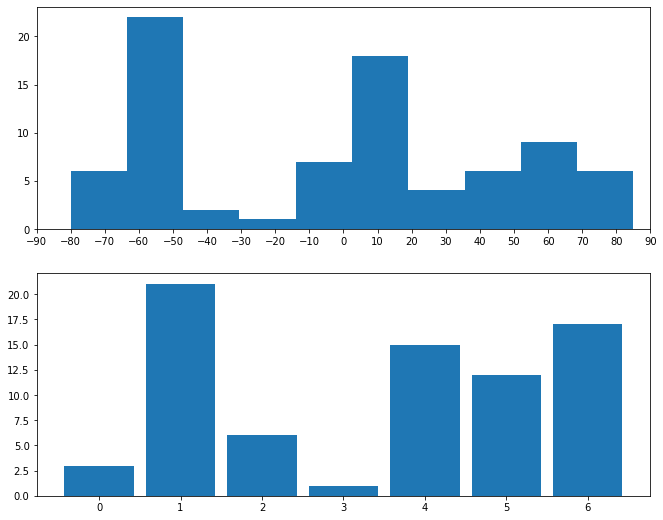

In [5]:
print(f"Numbers of samples in test set {df_test.shape}")


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))
df_test = get_labels(df_test, 20)

ax1.hist(df_test['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_test['labels'].min(), df_test['labels'].max() )]

ax2.hist(df_test['labels'], bins=bins, align='left', rwidth=0.85)


plt.show()


In [6]:
df_train['subject_id'].unique()

array([37, 51, 15, 41, 34,  8, 30, 31, 10, 55,  4, 11, 39,  2,  0, 19, 56,
       33,  5, 38, 63, 25,  3, 57,  9, 36,  6, 13, 43, 12, 64, 24, 49, 46,
       61, 26, 29, 20,  1, 28, 53, 32, 27, 14, 52, 45, 60, 62, 23, 18, 35,
       42, 59, 50, 16, 17, 48, 58,  7, 22, 44, 47])

# Chuncked dataset 1000

## Trainning set

In [6]:
df_chunck_train = pd.read_csv("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/balanced_dataset.csv")
df_chunck_train.head()

,Unnamed: 0,Unnamed: 0.1,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,labels,subject_id
0,0,0,0-0_37.wav,-57.0,17.0,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,1,37.0
1,1,1,0-1_37.wav,-57.0,17.0,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,1,37.0
2,2,2,0-2_37.wav,-57.0,17.0,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,1,37.0
3,3,3,0-3_37.wav,-57.0,17.0,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,1,37.0
4,4,4,1-2_37.wav,47.0,22.0,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,6,37.0


Numbers of samples in train-set-1000 (6511, 12)


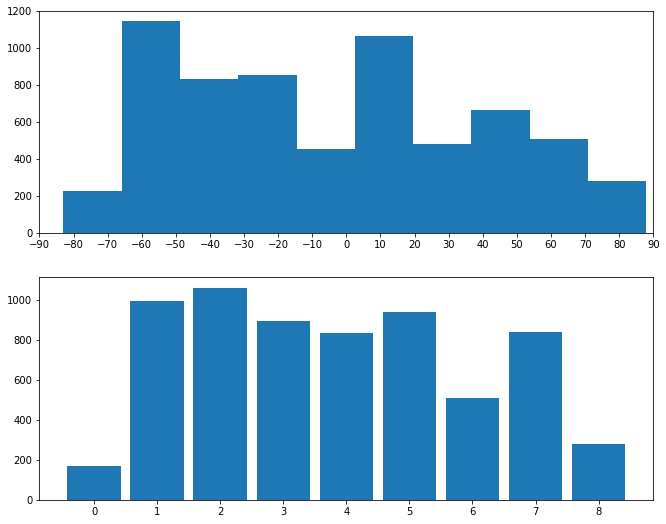

In [69]:
print(f"Numbers of samples in train-set-1000 {df_chunck_train.shape}")


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))
df_chunck_train = get_labels(df_chunck_train, 20)

ax1.hist(df_chunck_train['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 2 )]

ax2.hist(df_chunck_train['labels'], bins=bins, align='left', rwidth=0.85)
ax2.set_xticks(np.arange(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 1, 1.0))


plt.show()

### Balance the dataset colapsing external labels


In [70]:
df_chunck_train.loc[df_chunck_train['labels'] == 0, 'labels'] = 1
df_chunck_train.loc[df_chunck_train['labels'] == 8, 'labels'] = 7
df_chunck_train.to_csv('../balanced_dataset.csv')

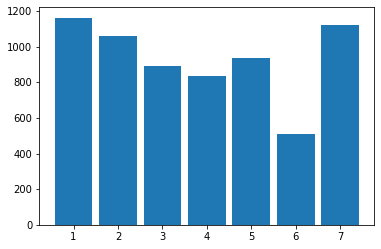

In [71]:

bins= [i for i in range(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 2 )]

plt.hist(df_chunck_train['labels'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 1, 1.0))
plt.show()

# Angles per subjects

Numbers of samples (59, 13)


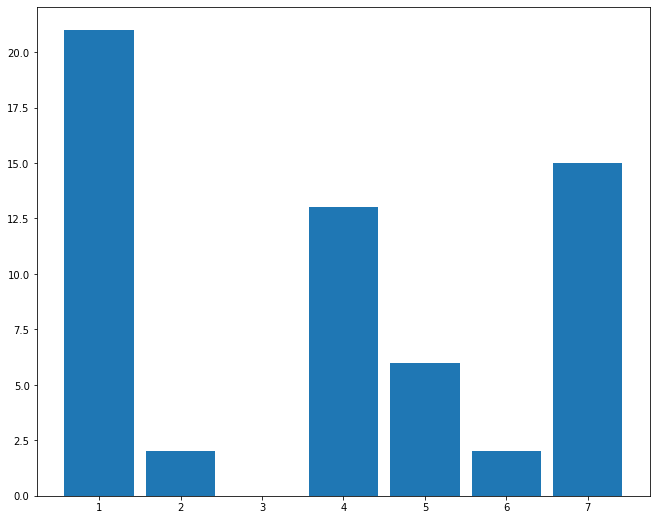

In [73]:
SUBJECT_ID=54
df_subject = df_chunck_train.query('subject_id ==@SUBJECT_ID').reset_index()
print(f"Numbers of samples {df_subject.shape}")

bins= [i for i in range(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 2 )]
plt.figure(figsize=(11, 9))
plt.hist(df_subject['labels'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 1, 1.0))
plt.show()

## Test set

In [10]:
df_chunck_test = pd.read_csv("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/test_dataset-1000.csv")
df_chunck_test.head()

,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,labels,subject_id
0,0-0_21.wav,-49.0,12.0,14.725275,0.021978,-33.637253,-0.131868,-0.001652,0.088391,41.0,21.0
1,0-2_21.wav,-49.0,12.0,14.725275,0.021978,-33.637253,-0.131868,-0.001652,0.088391,41.0,21.0
2,0-3_21.wav,-49.0,12.0,14.725275,0.021978,-33.637253,-0.131868,-0.001652,0.088391,41.0,21.0
3,1-0_21.wav,-27.0,19.0,4.703297,0.021978,0.208901,-0.131868,0.000106,0.084875,63.0,21.0
4,1-1_21.wav,-27.0,19.0,4.703297,0.021978,0.208901,-0.131868,0.000106,0.084875,63.0,21.0


In [11]:
df_chunck_test = get_labels(df_chunck_test, 20)

df_chunck_test.loc[df_chunck_test['labels'] == 0, 'labels'] = 1
df_chunck_test.loc[df_chunck_test['labels'] == 8, 'labels'] = 7
df_chunck_test.to_csv('../balanced_test-dataset.csv')

In [9]:

bins= [i for i in range(df_chunck_test['labels'].min(), df_chunck_test['labels'].max() + 2 )]

plt.hist(df_chunck_test['labels'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_chunck_test['labels'].min(), df_chunck_test['labels'].max() + 1, 1.0))
plt.show()

NameError: name 'df_chunck_test' is not defined

<Figure size 1080x648 with 0 Axes>

## Dataset-TV

Tv test set shape : (714, 11)


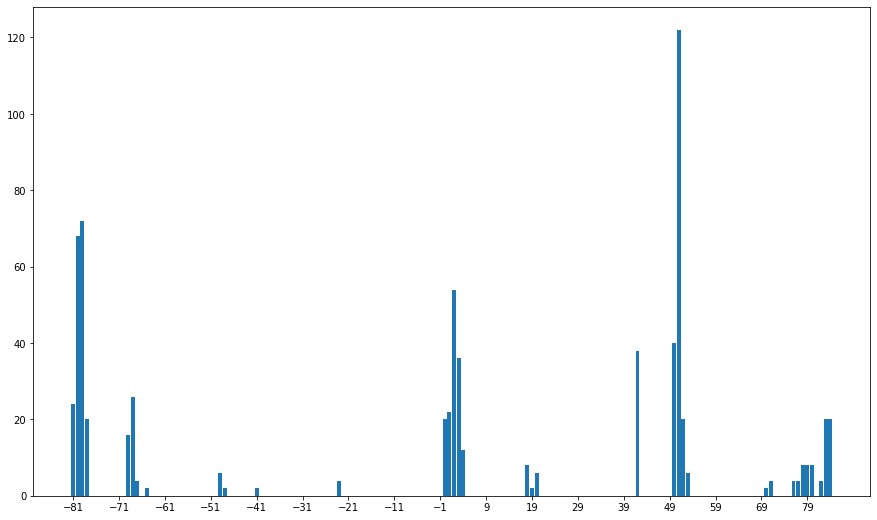

In [12]:
df_tv = pd.read_csv('/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/tv_test-dataset-1000.csv')
print("Tv test set shape : {}".format(df_tv.shape))
plt.figure(figsize=(15, 9))

bins= [i for i in range(int(df_tv['azimuth'].min()), int(df_tv['azimuth'].max() + 2 ))]

plt.hist(df_tv['azimuth'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_tv['azimuth'].min(), df_tv['azimuth'].max() + 1, 10.0))
plt.show()

# Feature visualization

In [34]:
import scipy.io.wavfile as wavfile
from librosa.display import specshow
import librosa
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
from utils import gcc_phat, butter_lowpass_filter, get_fft_gram

PATH_DATA='/home/jonas/Desktop/dataset-1000'
filename_left = df_chunck_test.query('labels == 1')['audio_filename'].values[4]
filename_right = df_chunck_test.query('labels == 3')['audio_filename'].values[1]

In [46]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

In [79]:
fs, left_audio = wavfile.read(os.path.join(PATH_DATA,filename_left))
fs, right_audio = wavfile.read(os.path.join(PATH_DATA,filename_right))


print("Sample rate: {0}Hz".format(fs))
print("Audio duration: {0}s".format(len(left_audio) / fs))

Sample rate: 48000Hz
Audio duration: 1.0s


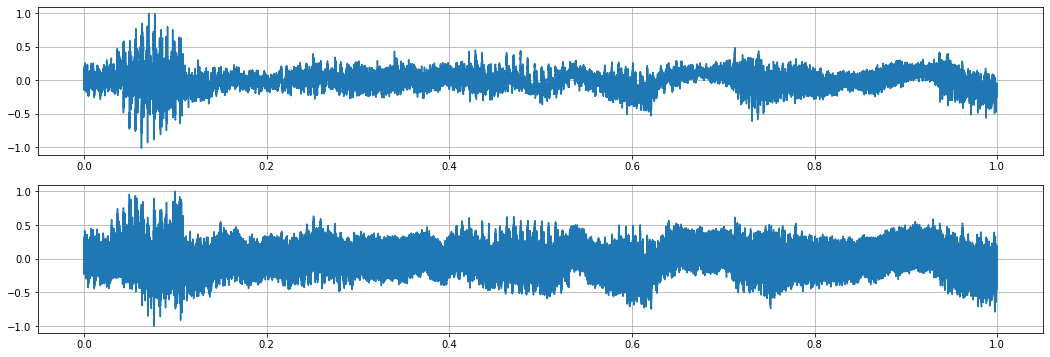

In [80]:
audio1 = normalize_audio(right_audio[:,0])
audio2 = normalize_audio(right_audio[:,1])

fig, ((ax1), (ax2)) = plt.subplots(2,1 ,figsize=(18,6) )

ax1.plot(np.linspace(0, len(audio1) / fs, num=len(audio)), audio1)
ax1.grid(True)

ax2.plot(np.linspace(0, len(audio2) / fs, num=len(audio)), audio2)
ax2.grid(True)

## Gammagram

In [98]:
left_gammagram1, left_gammagram2  = get_fft_gram(left_audio, fs, channels=1024)
right_gammagram1, right_gammagram2 = get_fft_gram(right_audio, fs, channels=1024)

left_gammagram1 = np.flipud(20 * np.log10(left_gammagram1))
left_gammagram2 = np.flipud(20 * np.log10(left_gammagram2))

right_gammagram1 = np.flipud(20 * np.log10(right_gammagram1))
right_gammagram2 = np.flipud(20 * np.log10(right_gammagram2))

print(left_gammagram1.shape)


(1024, 21)


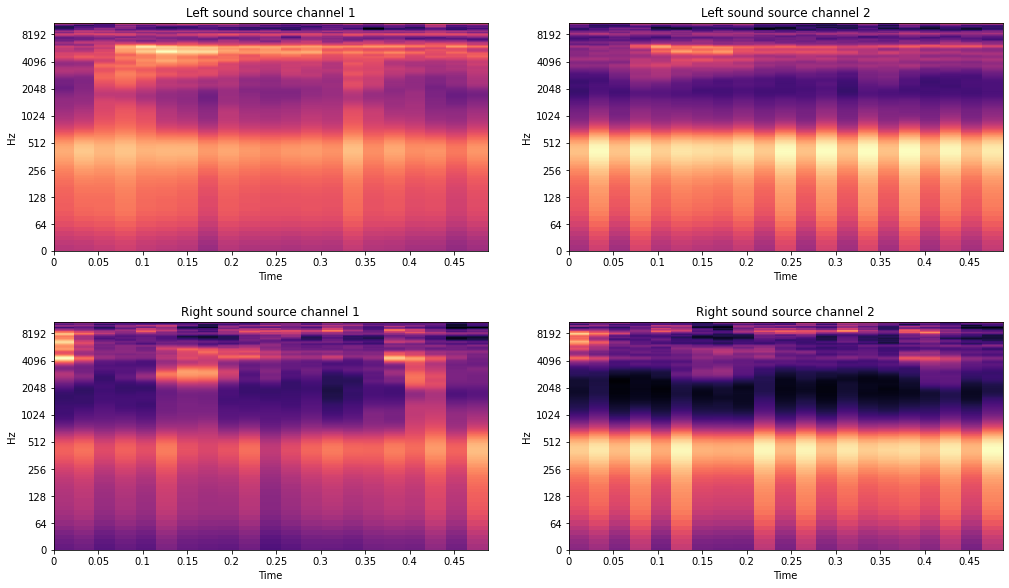

In [99]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 , figsize=(15,9))
fig.tight_layout(pad=5.0)

specshow(left_gammagram1, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title("Left sound source channel 1")

specshow(left_gammagram2, x_axis='time', y_axis='log', ax=ax2)
ax2.set_title("Left sound source channel 2")

specshow(right_gammagram1, x_axis='time', y_axis='log', ax=ax3)
ax3.set_title("Right sound source channel 1")

specshow(right_gammagram2, x_axis='time', y_axis='log', ax=ax4)
ax4.set_title("Right sound source channel 2")


plt.show()

In [111]:
import matplotlib


def erb_point(low_freq, high_freq, fraction):
    """
    Calculates a single point on an ERB scale between ``low_freq`` and
    ``high_freq``, determined by ``fraction``. When ``fraction`` is ``1``,
    ``low_freq`` will be returned. When ``fraction`` is ``0``, ``high_freq``
    will be returned.
    
    ``fraction`` can actually be outside the range ``[0, 1]``, which in general
    isn't very meaningful, but might be useful when ``fraction`` is rounded a
    little above or below ``[0, 1]`` (eg. for plot axis labels).
    """
    # Change the following three parameters if you wish to use a different ERB
    # scale. Must change in MakeERBCoeffs too.
    # TODO: Factor these parameters out
    ear_q = 9.26449 # Glasberg and Moore Parameters
    min_bw = 24.7
    order = 1

    # All of the following expressions are derived in Apple TR #35, "An
    # Efficient Implementation of the Patterson-Holdsworth Cochlear Filter
    # Bank." See pages 33-34.
    erb_point = (
        -ear_q * min_bw
        + np.exp(
            fraction * (
                -np.log(high_freq + ear_q * min_bw)
                + np.log(low_freq + ear_q * min_bw)
                )
        ) *
        (high_freq + ear_q * min_bw)
    )
    
    return erb_point

class ERBFormatter(matplotlib.ticker.EngFormatter):
    """
    Axis formatter for gammatone filterbank analysis. This formatter calculates
    the ERB spaced frequencies used for analysis, and renders them similarly to
    the engineering axis formatter.
    The scale is changed so that `[0, 1]` corresponds to ERB spaced frequencies
    from ``high_freq`` to ``low_freq`` (note the reversal). It should be used
    with ``imshow`` where the ``extent`` argument is ``[a, b, 1, 0]`` (again,
    note the inversion).
    """

    def __init__(self, low_freq, high_freq, *args, **kwargs):
        """
        Creates a new :class ERBFormatter: for use with ``matplotlib`` plots.
        Note that this class does not supply the ``units`` or ``places``
        arguments; typically these would be ``'Hz'`` and ``0``.
        :param low_freq: the low end of the gammatone filterbank frequency range
        :param high_freq: the high end of the gammatone filterbank frequency
          range
        """
        self.low_freq = low_freq
        self.high_freq = high_freq
        super().__init__(*args, **kwargs)

    def _erb_axis_scale(self, fraction):
        return erb_point(self.low_freq, self.high_freq, fraction)

    def __call__(self, val, pos=None):
        newval = self._erb_axis_scale(val)
        return super().__call__(newval, pos)

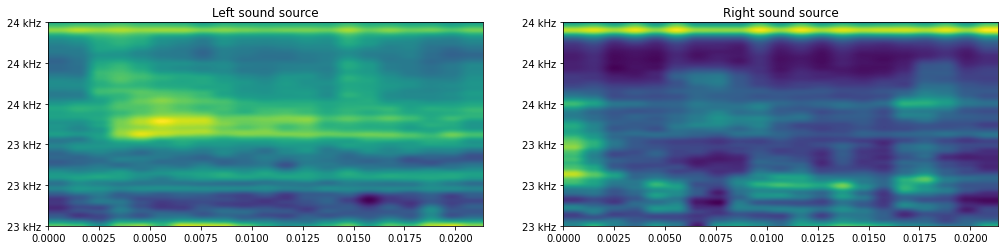

In [112]:
import scipy

duration = len(left_gammagram1) / fs

formatter = ERBFormatter(20, fs/2, unit='Hz', places=0)

fig, ((ax1), (ax2)) = plt.subplots(1,2 , figsize=(15,9))
fig.tight_layout(pad=5.0)

aspect_ratio = duration/scipy.constants.golden

ax1.imshow(left_gammagram1, extent=[0, duration, 0.01, 0])
ax1.set_title("Left sound source")
ax1.yaxis.set_major_formatter(formatter)

ax2.imshow(right_gammagram2, extent=[0, duration, 0.01, 0])
ax2.set_title("Right sound source")
ax2.yaxis.set_major_formatter(formatter)


## MFCC

In [58]:
def get_mfcc(data, fs, n_f=120):
    signal1 = data[:, 0]
    signal2 = data[:, 1]
    input_1 = librosa.feature.mfcc(signal1.astype(float), fs, n_mfcc=n_f)
    input_2 = librosa.feature.mfcc(signal2.astype(float), fs, n_mfcc=n_f)

    input_x = np.stack((input_1, input_2), axis=-1)
    return input_x
    

In [63]:
left_mfcc = get_mfcc(left_audio, fs, 5)
right_mfcc = get_mfcc(right_audio, fs, 5)

print("MFCC shape {}".format(left_mfcc.shape))


MFCC shape (5, 94, 2)


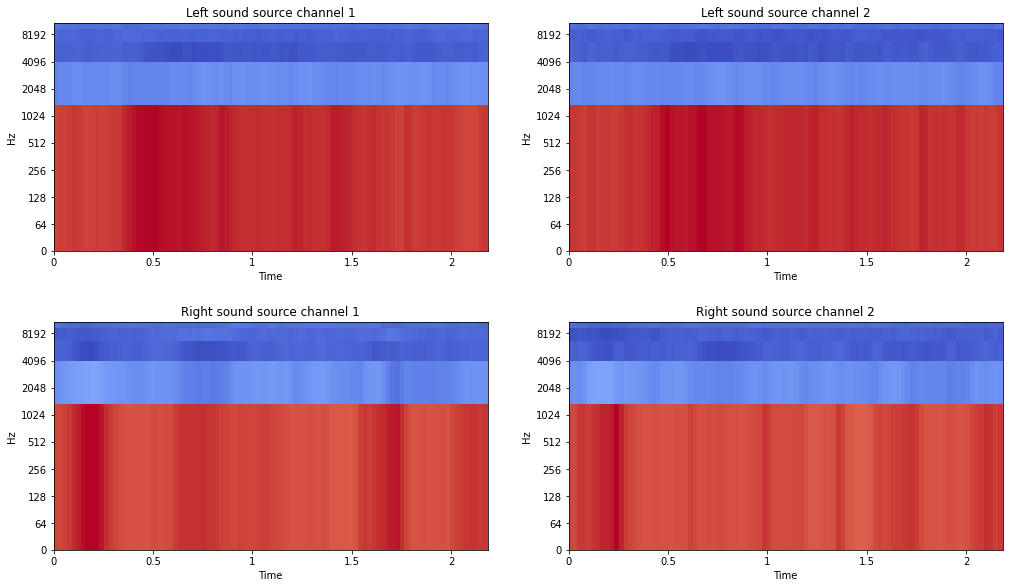

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 , figsize=(15,9))
fig.tight_layout(pad=5.0)


specshow(left_mfcc[:,:,0], x_axis='time', y_axis='log', ax=ax1)
ax1.set_title("Left sound source channel 1")

specshow(left_mfcc[:,:,1], x_axis='time', y_axis='log', ax=ax2)
ax2.set_title("Left sound source channel 2")
         
         
specshow(right_mfcc[:,:,0], x_axis='time', y_axis='log', ax=ax3)
ax3.set_title("Right sound source channel 1")

specshow(right_mfcc[:,:,1], x_axis='time', y_axis='log', ax=ax4)
ax4.set_title("Right sound source channel 2")
         
plt.show()


## GCC-PHAT